# Tugas Besar IF2220 Probabilitas dan Statistika


> 13522057 Mohammad Fairuz Alauddin Yahya

> 13522095 Rayhan Fadhlan Azka

## Inisialisasi library

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("phone.csv")


## Problem 1

#### Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 


In [185]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_numeric = df.select_dtypes(include=[np.number])
def get_mode(x):
    try:
        mode = x.mode()[1]
        mode = 'multivalued'
    except:
        mode = x.mode()[0]
    return mode 
stat = pd.DataFrame()

stat["Mean"] = df_numeric.mean()
stat["Median"] = df_numeric.median()
stat["Mode"] = df_numeric.apply(get_mode)
stat["Deviasi"] = df_numeric.std()
stat["Var"] = df_numeric.var()
stat["Min"] = df_numeric.min()
stat["Max"] = df_numeric.max()
stat["Range"] = stat["Max"] - stat["Min"]
stat["Q1"] = df_numeric.quantile(0.25)
stat["Q2"] = df_numeric.quantile(0.5)
stat["Q3"] = df_numeric.quantile(0.75)
stat["IQR"] = stat["Q3"] - stat["Q1"]
stat["Skewness"] = df_numeric.skew()
stat["Kurtosis"] = df_numeric.kurtosis()
stat

,Mean,Median,Mode,Deviasi,Var,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
battery_power,1920.877299,1922.399154,multivalued,136.278720,1.857189e+04,1420.954271,2401.957818,981.003547,1834.014686,1922.399154,2011.295713,177.281027,-0.041291,0.220792
clock_speed,1.102641,1.100199,multivalued,0.300748,9.044962e-02,0.063078,2.145640,2.082561,0.902938,1.100199,1.308174,0.405236,-0.042815,0.050614
ram,6.051994,6.016748,multivalued,2.010296,4.041289e+00,-2.140214,12.147370,14.287584,4.689994,6.016748,7.413723,2.723729,0.062848,-0.048518
n_cores,12.044035,12.072605,multivalued,2.235806,4.998827e+00,5.634702,22.191140,16.556438,10.561141,12.072605,13.542862,2.981721,0.009754,0.015851
use_time,8.044158,8.033139,multivalued,1.184142,1.402191e+00,3.994350,11.856342,7.861993,7.279726,8.033139,8.869837,1.590111,-0.072757,0.026641
px_width,728.718192,728.653821,multivalued,0.701806,4.925318e-01,726.673319,731.401917,4.728598,728.229459,728.653821,729.177175,0.947716,0.392639,0.032217
px_height,1035.293102,1035.366543,multivalued,0.701960,4.927481e-01,1032.823317,1037.509932,4.686615,1034.864311,1035.366543,1035.792837,0.928526,-0.446624,0.110403
5g,0.507224,0.509358,multivalued,0.288386,8.316620e-02,0.000147,2.000000,1.999853,0.255934,0.509358,0.755849,0.499915,0.058566,-0.872118
price,7964.742750,7983.607488,0.0,2006.150234,4.024639e+06,-1.000000,15293.505980,15294.505980,6657.919039,7983.607488,9247.301479,2589.382440,-0.037486,0.266474


<p>Dapat dilihat data tersebut memiliki nilai ram dan price yang negatif, dimana hal tersebut tidak logis, sehingga kami melakukan cleansing data dengan menghapus baris yang memiliki data negatif tersebut</p>

In [186]:
df = df[(df['ram'] >= 0) & (df['price'] >= 0)]
df_numeric = df.select_dtypes(include=[np.number])
def get_mode(x):
    try:
        mode = x.mode()[1]
        mode = 'multivalued'
    except:
        mode = x.mode()[0]
    return mode 
stat = pd.DataFrame()

stat["Mean"] = df_numeric.mean()
stat["Median"] = df_numeric.median()
stat["Mode"] = df_numeric.apply(get_mode)
stat["Deviasi"] = df_numeric.std()
stat["Var"] = df_numeric.var()
stat["Min"] = df_numeric.min()
stat["Max"] = df_numeric.max()
stat["Range"] = stat["Max"] - stat["Min"]
stat["Q1"] = df_numeric.quantile(0.25)
stat["Q2"] = df_numeric.quantile(0.5)
stat["Q3"] = df_numeric.quantile(0.75)
stat["IQR"] = stat["Q3"] - stat["Q1"]
stat["Skewness"] = df_numeric.skew()
stat["Kurtosis"] = df_numeric.kurtosis()
stat

,Mean,Median,Mode,Deviasi,Var,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
battery_power,1921.019932,1922.512779,multivalued,136.231999,1.855916e+04,1420.954271,2401.957818,981.003547,1834.106538,1922.512779,2011.317285,177.210747,-0.041514,0.223180
clock_speed,1.102586,1.100199,multivalued,0.300795,9.047739e-02,0.063078,2.145640,2.082561,0.902780,1.100199,1.307828,0.405047,-0.042659,0.051200
ram,6.056451,6.019183,multivalued,2.002862,4.011457e+00,0.071127,12.147370,12.076243,4.690202,6.019183,7.415286,2.725084,0.091256,-0.142812
n_cores,12.047175,12.073676,multivalued,2.232471,4.983927e+00,5.634702,22.191140,16.556438,10.563360,12.073676,13.543293,2.979933,0.016869,0.004956
use_time,8.044615,8.034224,multivalued,1.184612,1.403305e+00,3.994350,11.856342,7.861993,7.278961,8.034224,8.871452,1.592491,-0.073778,0.024902
px_width,728.717673,728.653524,multivalued,0.701911,4.926791e-01,726.673319,731.401917,4.728598,728.228816,728.653524,729.176956,0.948140,0.394332,0.033781
px_height,1035.293368,1035.366543,multivalued,0.701217,4.917049e-01,1032.823317,1037.509932,4.686615,1034.865707,1035.366543,1035.792326,0.926618,-0.446185,0.115950
5g,0.507423,0.509780,multivalued,0.288427,8.319033e-02,0.000147,2.000000,1.999853,0.256117,0.509780,0.756515,0.500398,0.057342,-0.872334
price,7968.021304,7983.607488,0.0,1998.970138,3.995882e+06,0.000000,15293.505980,15293.505980,6660.689288,7983.607488,9245.986777,2585.297489,-0.011313,0.190334


#### Nilai Modus yang memiliki multivalue

In [187]:
df.mode()

,battery_power,clock_speed,ram,n_cores,use_time,px_width,px_height,brand,5g,grade,price
0,1420.954271,0.063078,0.071127,5.634702,3.994350,726.673319,1032.823317,sumseng,0.000147,A,0.0
1,1477.965749,0.086511,0.434078,5.640941,4.160599,726.877207,1032.940610,NaN,0.001635,NaN,NaN
2,1488.948363,0.178785,0.473096,5.705081,4.257735,726.969832,1032.981014,NaN,0.001847,NaN,NaN
3,1493.397642,0.188163,0.547202,5.748217,4.670485,726.992626,1033.001635,NaN,0.003802,NaN,NaN
4,1506.515170,0.202770,0.592505,5.763836,4.675472,727.102922,1033.013906,NaN,0.003835,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1993,2321.463264,1.954328,12.036310,18.273326,11.539920,730.855474,1036.916911,NaN,0.998860,NaN,NaN
1994,2331.185458,1.974235,12.037179,18.452401,11.542616,730.908714,1036.921031,NaN,0.999076,NaN,NaN
1995,2352.078882,1.981452,12.096538,18.774827,11.649750,730.930922,1036.926264,NaN,0.999077,NaN,NaN
1996,2363.451821,2.056815,12.139339,19.697229,11.765387,730.941198,1037.038778,NaN,0.999216,NaN,NaN


<p> nilai modus multivalue ini mencapai 2000 data karena di setiap kolom memiliki nilai yang berbeda-beda, sehingga kemunculan terbanyak adalah satu kali kemunculan </p>

#### Deskripsi statistika kolom data yang berupa string

In [188]:
unique_values = df['brand'].value_counts(normalize=True)

unique_values_df = pd.DataFrame(unique_values)
unique_values_df

,proportion
brand,
sumseng,0.337838
oranye,0.239239
largeyou,0.212212
appa,0.209209
undefined,0.001502


In [189]:
unique_values = df['grade'].value_counts(normalize=True)

unique_values_df = pd.DataFrame(unique_values)
unique_values_df

,proportion
grade,
A,0.346847
B,0.341341
C,0.311812


## Nomor 3

#### Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 


In [190]:
dataHeader = df.columns

plt.rcParams['boxplot.boxprops.linewidth'] = 2
plt.rcParams['boxplot.whiskerprops.linewidth'] = 2
plt.rcParams['boxplot.capprops.linewidth'] = 2
plt.rcParams['boxplot.medianprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.marker'] = 'o'
plt.rcParams['boxplot.flierprops.markersize'] = 8
plt.rcParams['boxplot.flierprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.markeredgecolor'] = '#ab1ba5'


In [191]:
def generate_plot(col) :

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
    plt.subplot(2, 1, 1)

    ax1.set_title(col.upper())
    counts, bins, patches = ax1.hist(df[col], bins=10, rwidth=0.8, color="#ab1ba5")
    ax1.set_facecolor('#d7dbe2')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')

    # Add x values to each bar
    for count, bin, patch in zip(counts, bins, patches):
        height = patch.get_height()
        ax1.text(bin, height, str(count))

    ax2.boxplot(df[col], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#e5bae4', color='#ab1ba5'), capprops=dict(color='#ab1ba5'), medianprops=dict(color='#ab1ba5'), flierprops=dict(color='#ab1ba5'), whiskerprops=dict(color='#ab1ba5'))
    ax2.set_facecolor('#d7dbe2')
    ax2.tick_params(axis='y', which='both', length=0)
    ax2.yaxis.tick_right()

    plt.show()

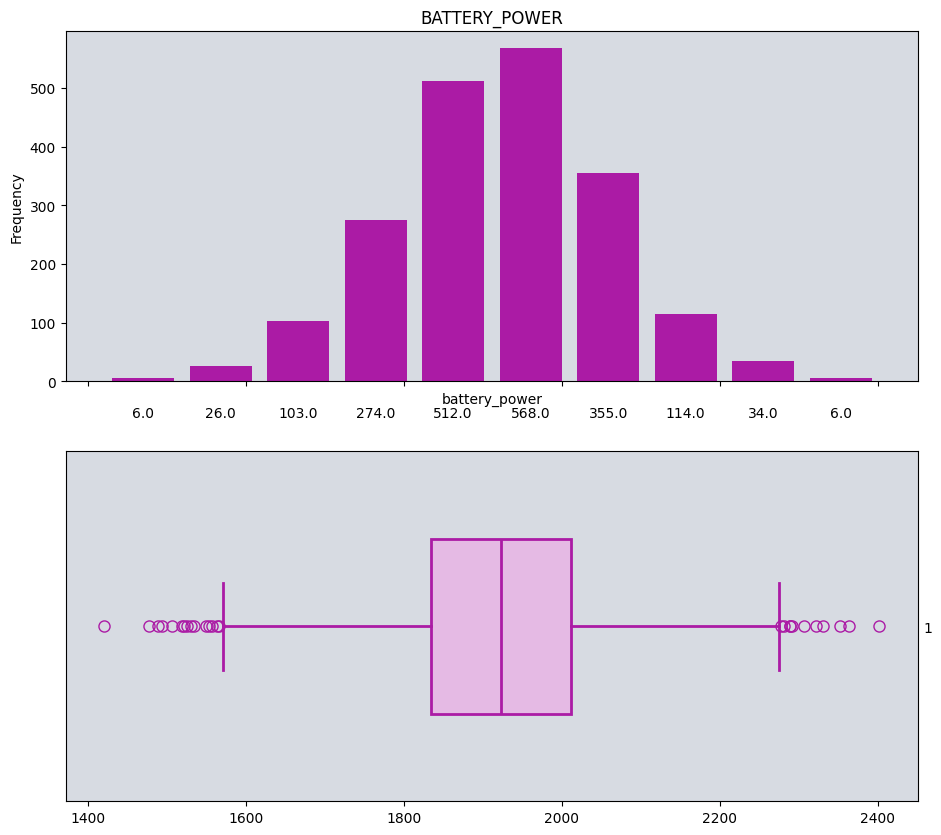

In [192]:
generate_plot(dataHeader[0])